# Fraud Detection Model Comparison

This notebook compares the performance of different ML models for fraud detection.

## Models Compared
1. CatBoost
2. XGBoost
3. LightGBM
4. Random Forest
5. Isolation Forest


In [1]:
import sys
sys.path.insert(0, '..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')


## Load Model Comparison Results


In [2]:
# Load comparison results from training
results_path = '../../models/model_comparison.csv'
try:
    comparison_df = pd.read_csv(results_path)
    print("Model comparison results loaded successfully!")
    display(comparison_df)
except FileNotFoundError:
    print(f"Results file not found at {results_path}")
    print("Please run the training script first: python train.py")


Model comparison results loaded successfully!


,model,accuracy,precision,recall,f1,roc_auc,pr_auc,true_positives,false_positives,true_negatives,false_negatives,fraud_detection_rate,false_alarm_rate,rank
0,catboost,0.754833,0.460177,0.626978,0.530781,0.781212,0.557652,832,976,3697,495,0.626978,0.208859,1
1,lightgbm,0.758833,0.466292,0.625471,0.534277,0.779980,0.554650,830,950,3723,497,0.625471,0.203296,2
2,random_forest,0.787000,0.516701,0.571213,0.542591,0.777520,0.551149,758,709,3964,569,0.571213,0.151723,3
3,xgboost,0.771167,0.485350,0.574228,0.526061,0.766482,0.531733,762,808,3865,565,0.574228,0.172908,4
4,isolation_forest,0.765500,0.376543,0.091937,0.147789,0.647589,0.325971,122,202,4471,1205,0.091937,0.043227,5


## Visualize Model Performance


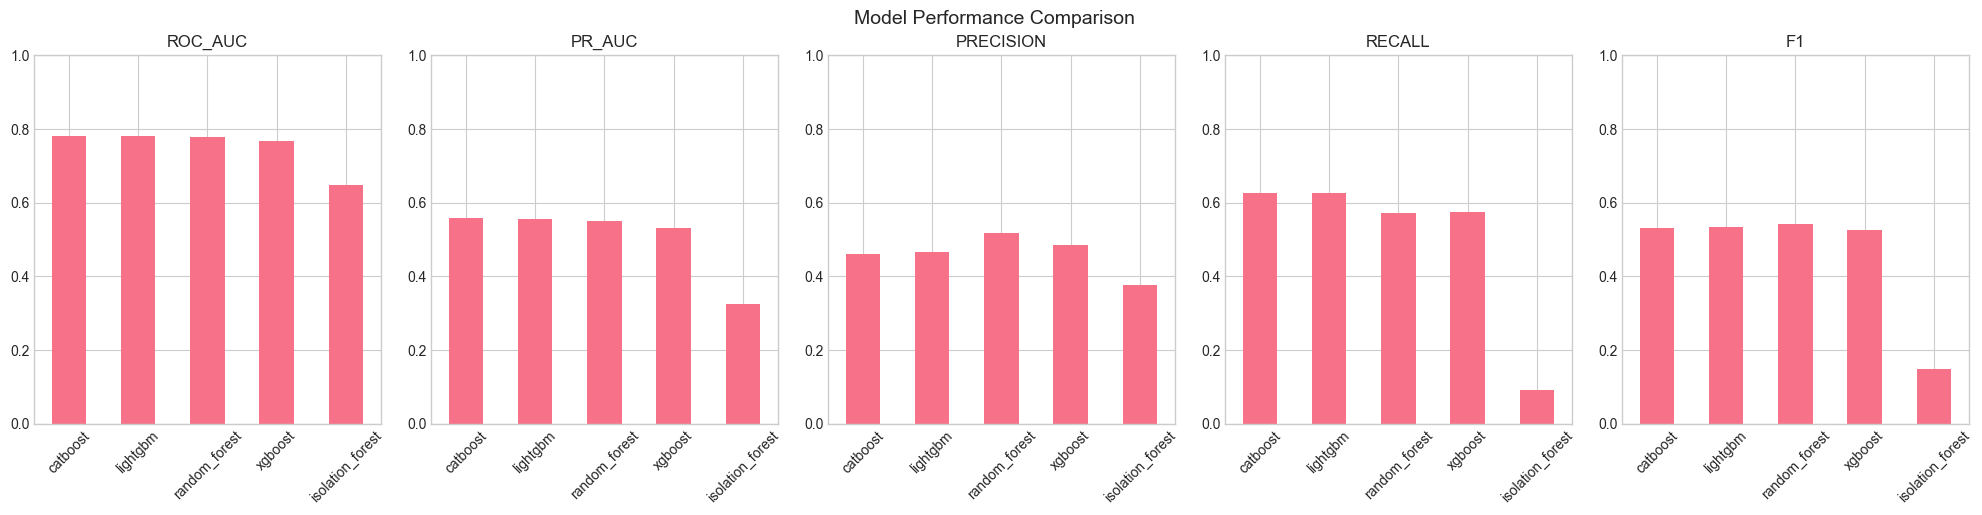

In [3]:
# Bar plot comparing key metrics
if 'comparison_df' in dir():
    metrics = ['roc_auc', 'pr_auc', 'precision', 'recall', 'f1']
    
    fig, axes = plt.subplots(1, len(metrics), figsize=(20, 5))
    
    for ax, metric in zip(axes, metrics):
        comparison_df.plot(x='model', y=metric, kind='bar', ax=ax, legend=False)
        ax.set_title(metric.upper())
        ax.set_xlabel('')
        ax.set_ylim(0, 1)
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.suptitle('Model Performance Comparison', y=1.02, fontsize=14)
    plt.savefig('../../models/model_comparison.png', dpi=150, bbox_inches='tight')
    plt.show()


## Summary Report


In [4]:
if 'comparison_df' in dir():
    print("=" * 60)
    print("FRAUD DETECTION MODEL COMPARISON SUMMARY")
    print("=" * 60)
    
    best_model = comparison_df.loc[comparison_df['roc_auc'].idxmax()]
    print(f"\nBest Overall Model (by ROC-AUC): {best_model['model']}")
    print(f"  ROC-AUC: {best_model['roc_auc']:.4f}")
    print(f"  PR-AUC: {best_model['pr_auc']:.4f}")
    print(f"  F1 Score: {best_model['f1']:.4f}")
    
    best_precision = comparison_df.loc[comparison_df['precision'].idxmax()]
    print(f"\nBest Precision Model: {best_precision['model']}")
    print(f"  Precision: {best_precision['precision']:.4f}")
    
    best_recall = comparison_df.loc[comparison_df['recall'].idxmax()]
    print(f"\nBest Recall Model: {best_recall['model']}")
    print(f"  Recall: {best_recall['recall']:.4f}")
    
    print("\n" + "=" * 60)


FRAUD DETECTION MODEL COMPARISON SUMMARY

Best Overall Model (by ROC-AUC): catboost
  ROC-AUC: 0.7812
  PR-AUC: 0.5577
  F1 Score: 0.5308

Best Precision Model: random_forest
  Precision: 0.5167

Best Recall Model: catboost
  Recall: 0.6270

